<a href="https://colab.research.google.com/github/shaifulla36/Shaif282/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset Information
The traning archive contains 25,000 images of dogs and cats. Train your algorith on these files and predict the lebels for test1.zip

(1= dog , 0= cat)

## Download Dataset

In [ ]:
!wget https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip

--2025-05-31 16:40:39--  https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.193.24.207, 2600:140e:6:99d::317f, 2600:140e:6:9ab::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.193.24.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   251MB/s    in 3.1s    

2025-05-31 16:40:43 (251 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



## Unzip the Dataset

In [ ]:
!unzip kagglecatsanddogs_5340.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

## Import Modules

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import tqdm
import random
from keras.preprocessing.image import load_img
import PIL
warnings.filterwarnings('ignore')

## Create Dataframe for Input and Output

In [181]:
input_path = []
label = []

for class_name in os.listdir("PetImages"):
  for path in os.listdir("PetImages/"+class_name):
    if class_name == 'Cat':
      label.append(0)
    else:
        label.append(1)
        input_path.append(os.path.join("PetImages",class_name,path))
print(input_path[0],label[0])

PetImages/Dog/5572.jpg 1


In [182]:
input_path = []
label = []

for class_name in os.listdir("PetImages"):
  for path in os.listdir(os.path.join("PetImages",class_name)):
    # Append the input path for every file found, regardless of class
    input_path.append(os.path.join("PetImages",class_name,path))
    if class_name == 'Cat':
      label.append(0)
    else:
      # Append the label for every file found, regardless of class
      label.append(1)

# Add a check to ensure the lengths match before creating the DataFrame
if len(input_path) != len(label):
    print(f"Warning: Length mismatch between input_path ({len(input_path)}) and label ({len(label)})")

print(input_path[0],label[0])

df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
print(df.head())

PetImages/Dog/5572.jpg 1
                   images  label
0  PetImages/Dog/8628.jpg      1
1  PetImages/Dog/8746.jpg      1
2  PetImages/Cat/3396.jpg      0
3  PetImages/Cat/4830.jpg      0
4  PetImages/Dog/8733.jpg      1


In [183]:
for i in df ['images']:
    if '.jpg' not in i:
     print(i)

PetImages/Dog/Thumbs.db
PetImages/Cat/Thumbs.db


In [184]:
import PIL
l= []
for image in df['images']:
  try:
    img = PIL.Image.open(image)
  except:
    l.append(image)

l


['PetImages/Dog/Thumbs.db',
 'PetImages/Dog/11702.jpg',
 'PetImages/Cat/Thumbs.db',
 'PetImages/Cat/666.jpg']

In [185]:
# delete db files
df = df[df['images']!='PetImages/Cat/Thumbs.db']
df = df[df['images']!='PetImages/Dog/Thumbs.db']
df = df[df['images']!='PetImages/Cat/666.jpg']
df = df[df['images']!='PetImages/Dog/11702.jpg']
len(df)

24998

## Exploratory Data Analysis

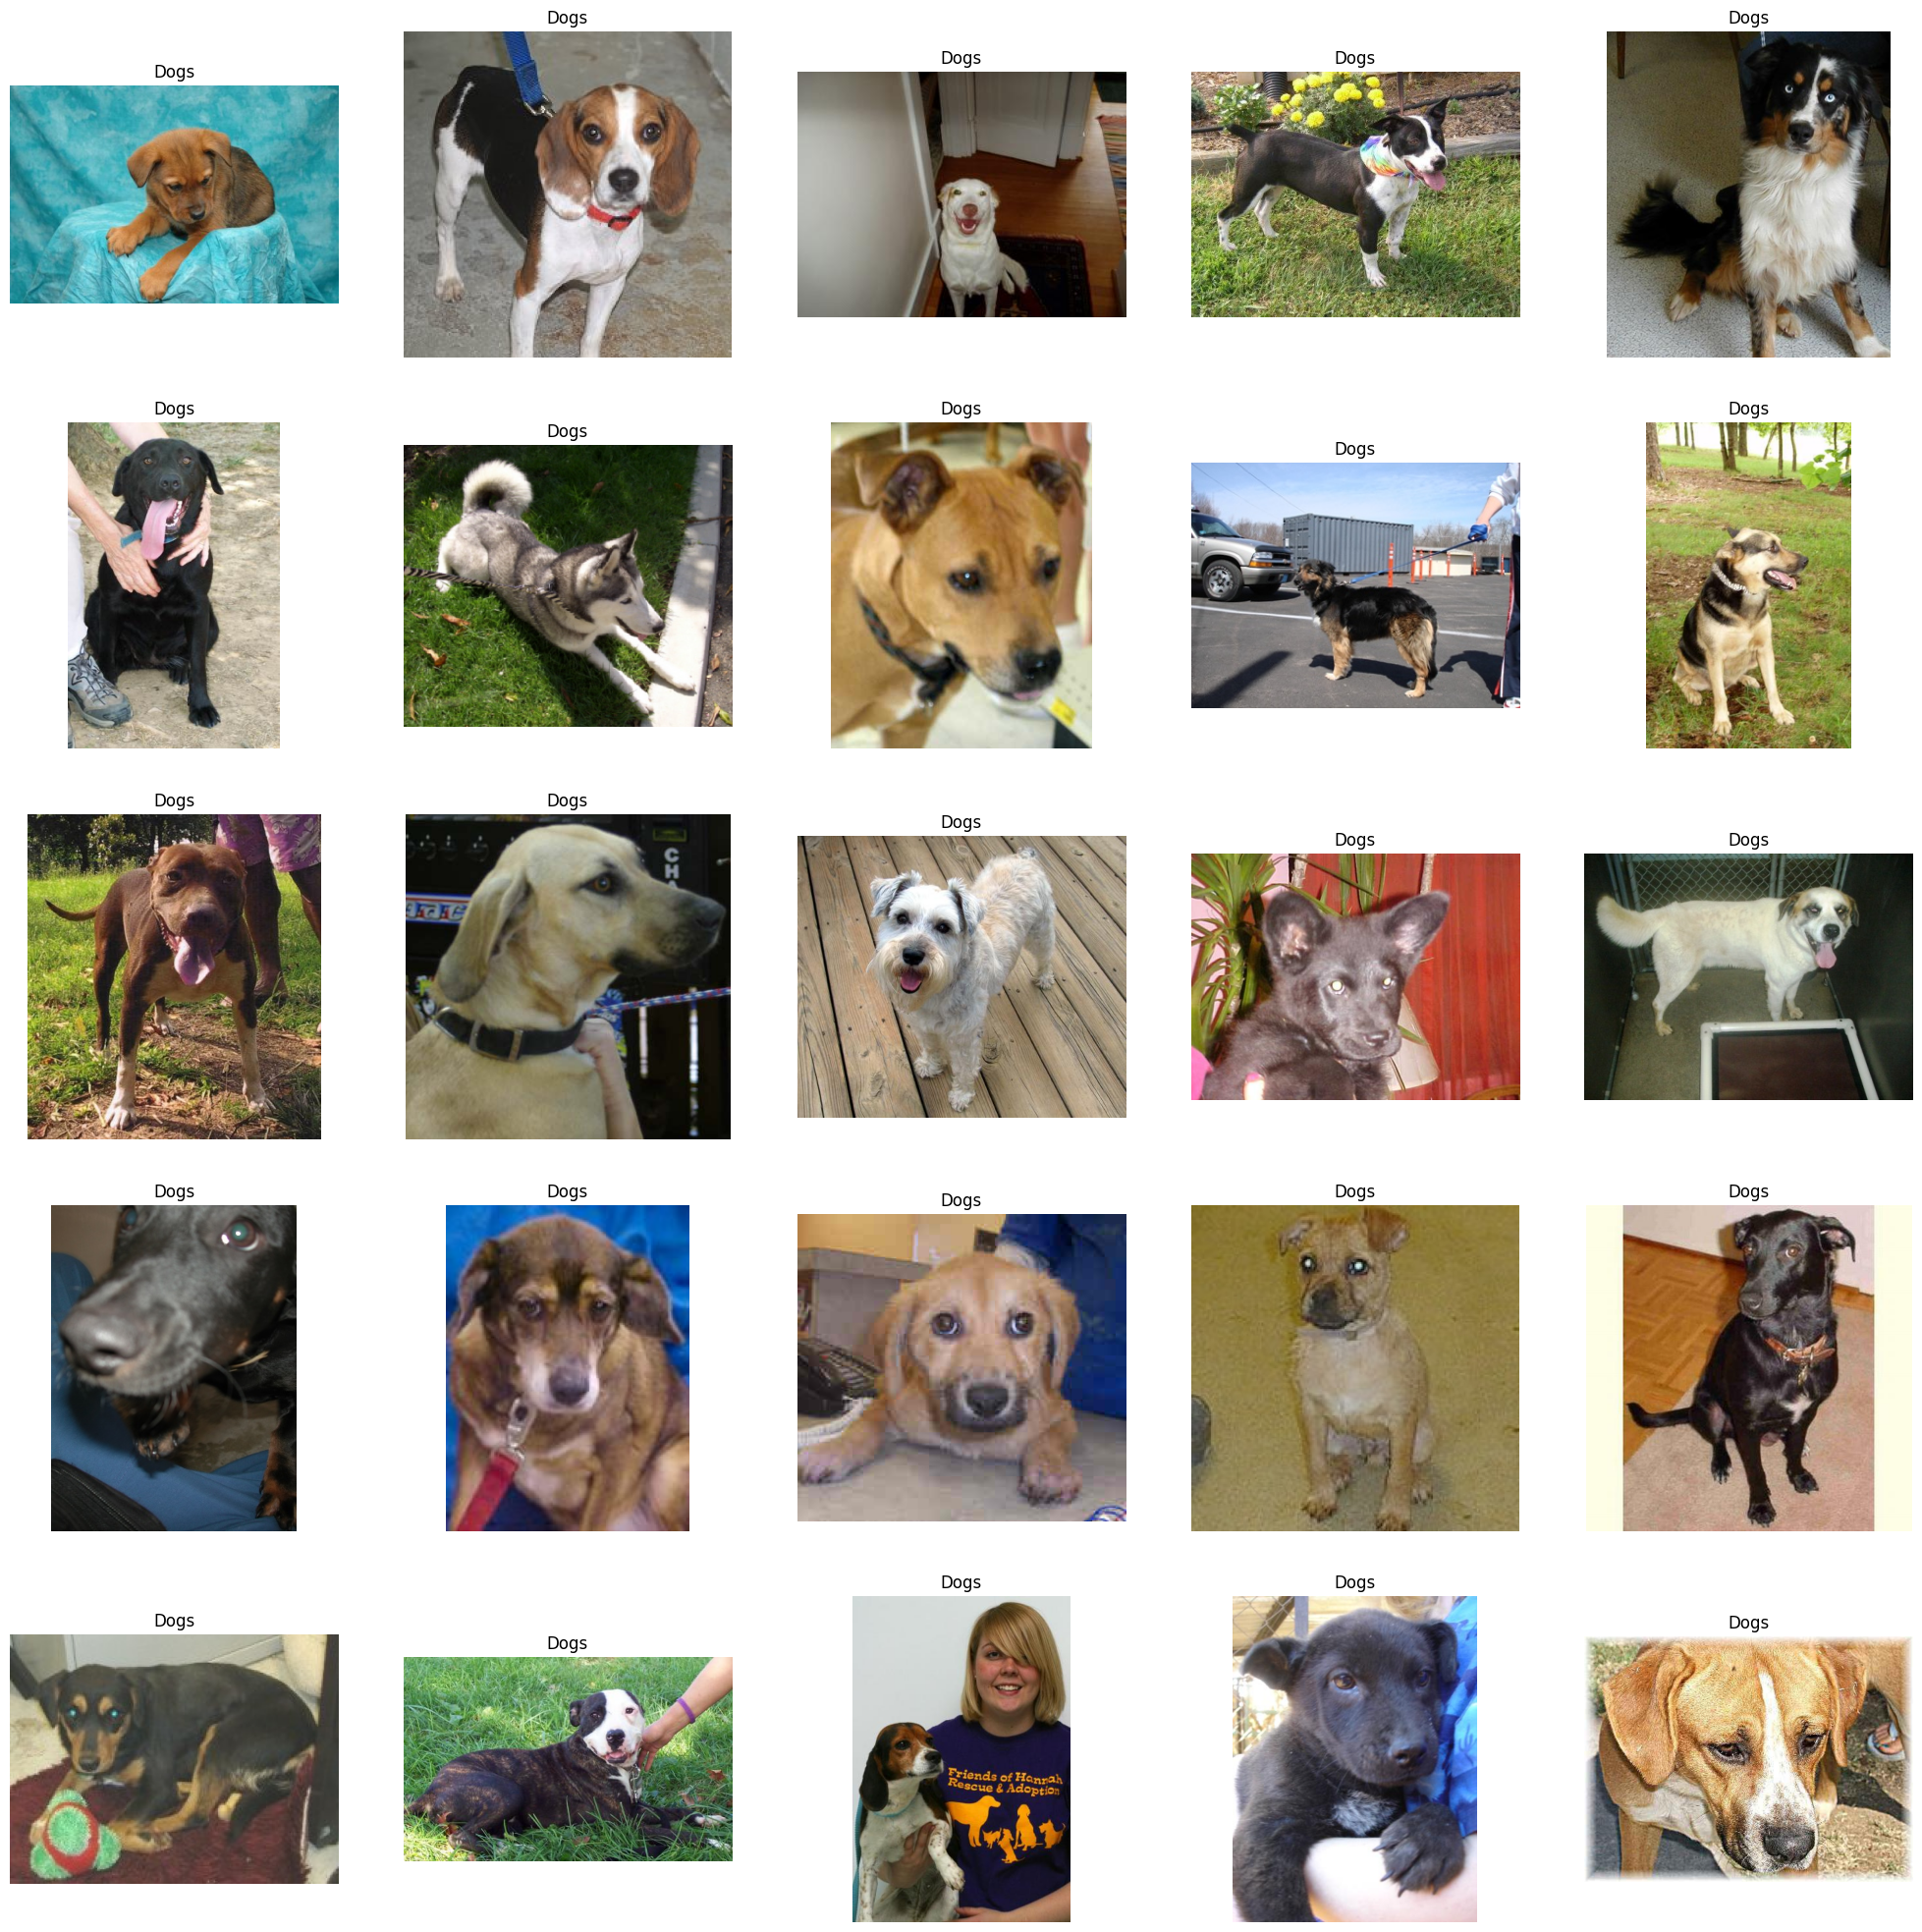

In [186]:
#to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0,len(temp))
files = temp[start:start+25]

for index,file in enumerate(files):
  plt.subplot(5,5,index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title('Dogs')
  plt.axis('off')

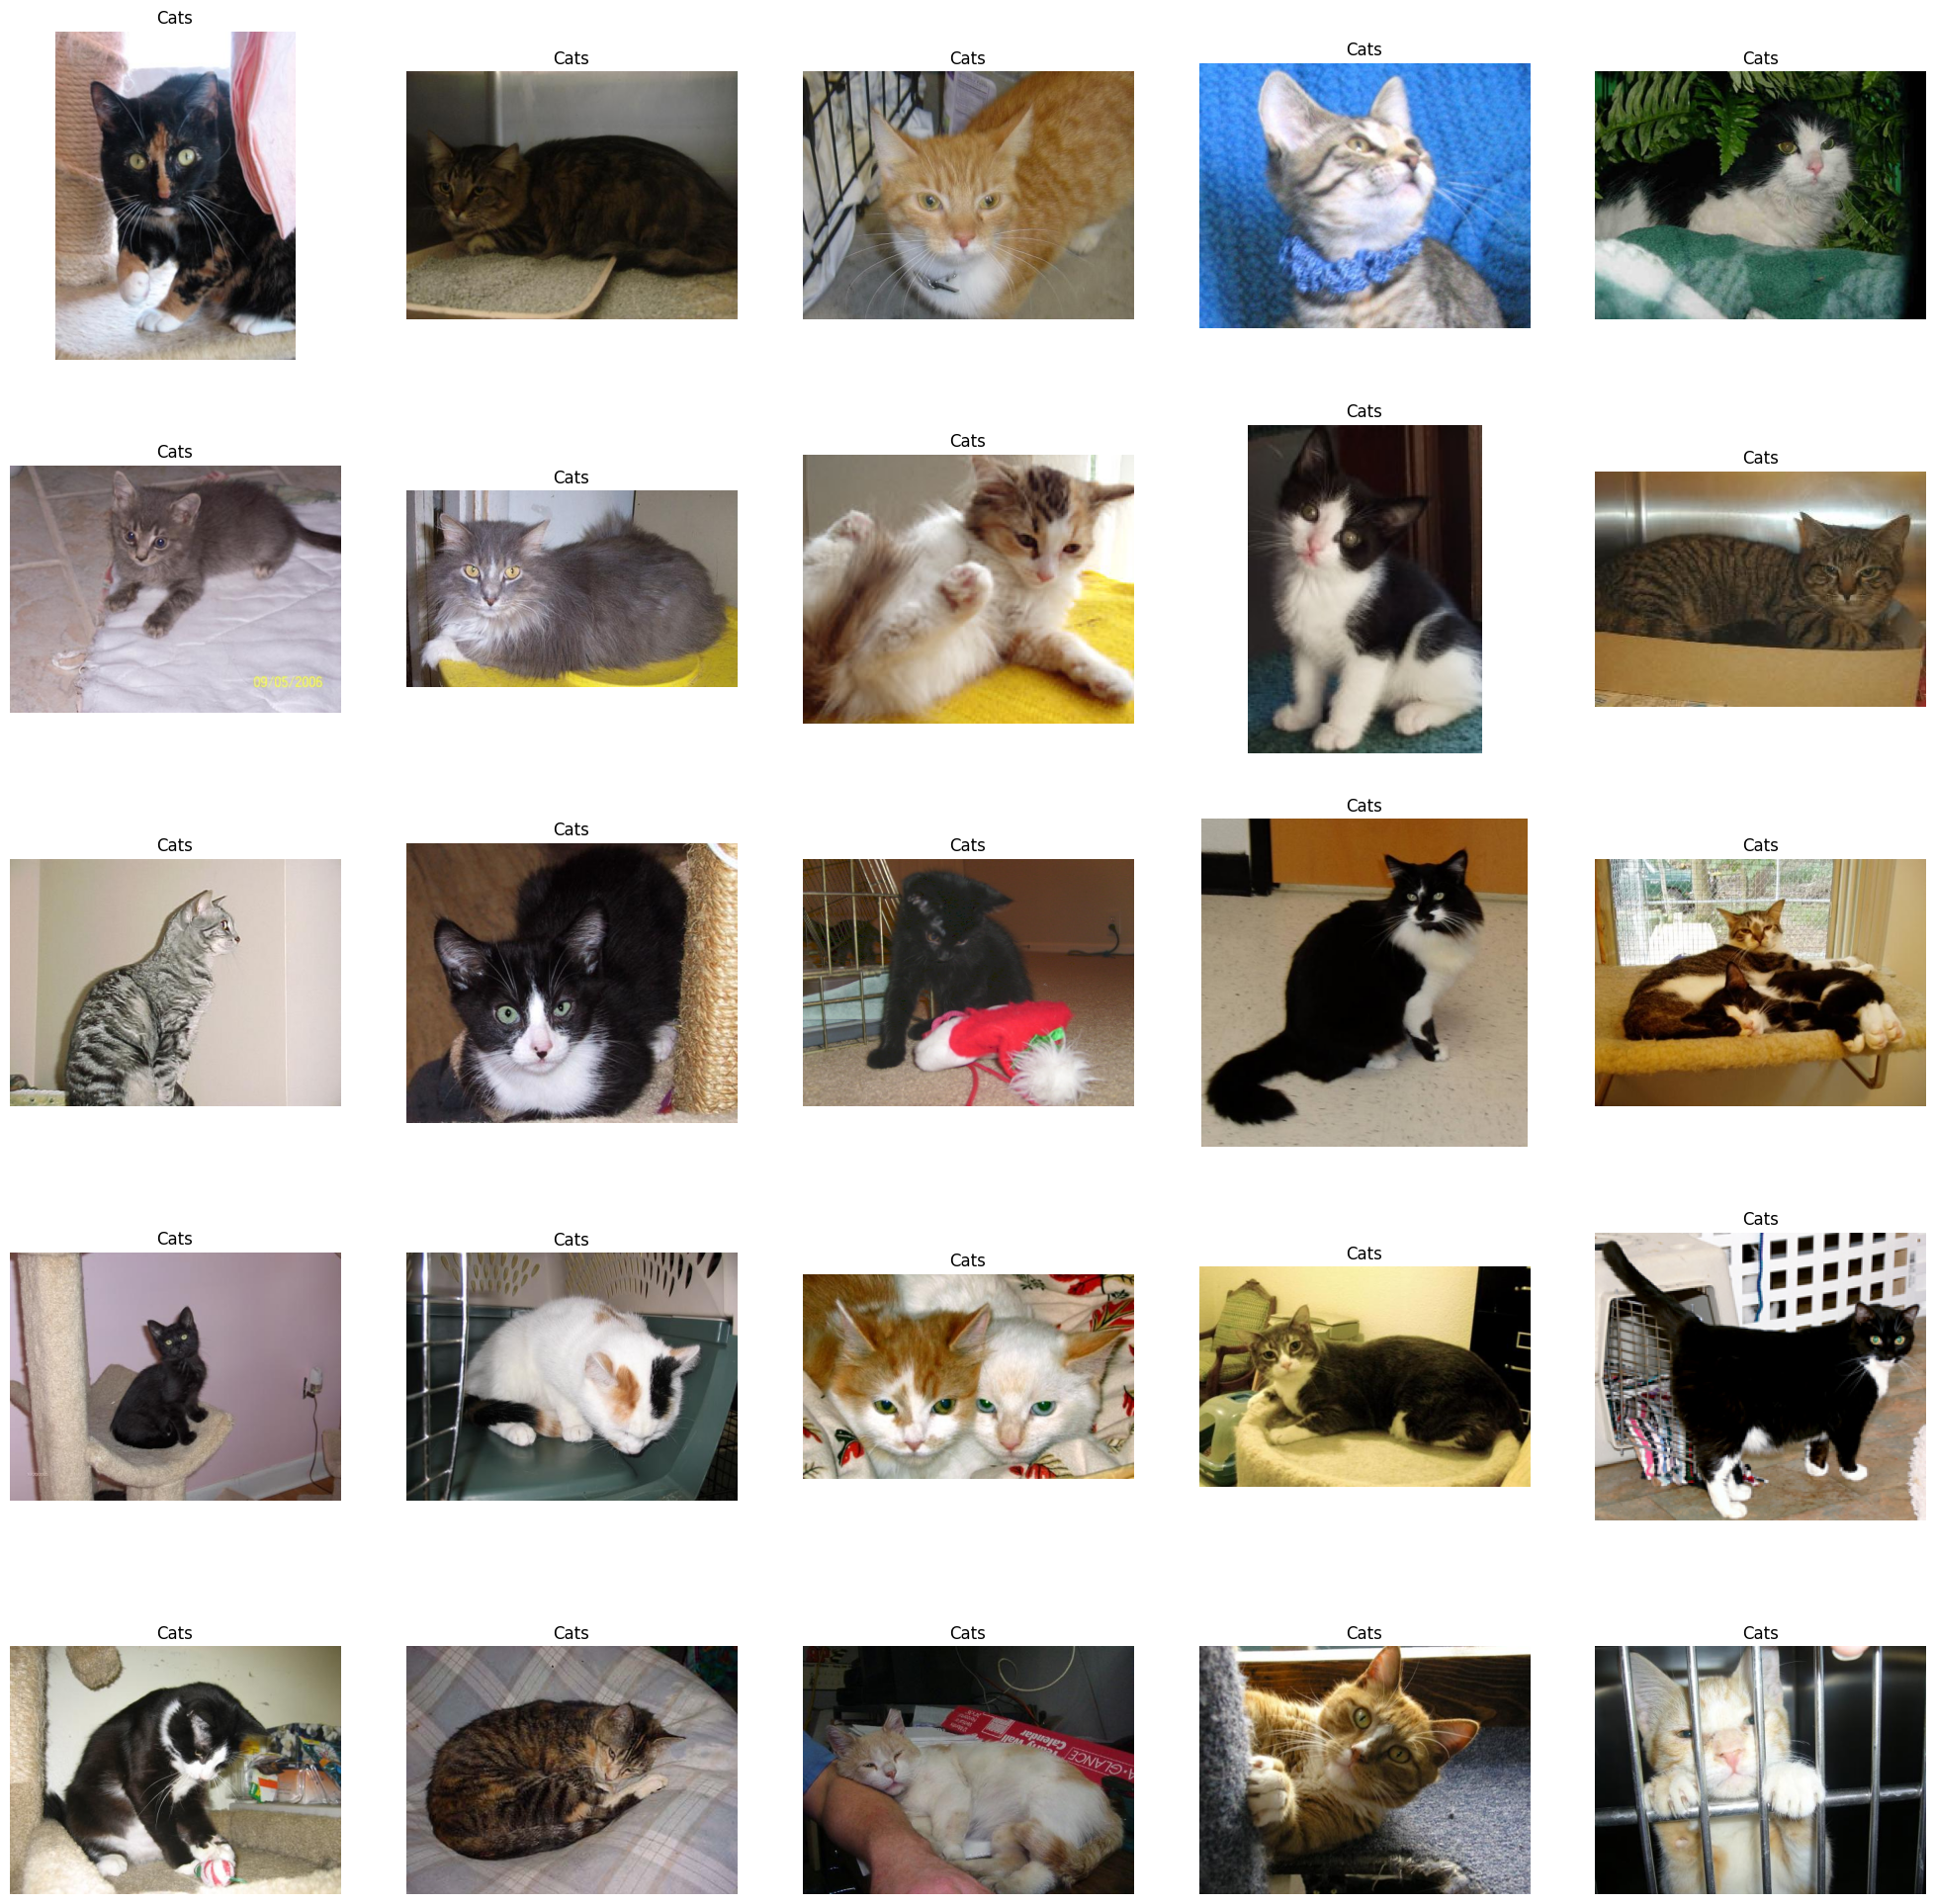

In [187]:
#to display grid of images
plt.figure(figsize=(25, 25))
temp = df[df['label'] == 0]['images']
start = random.randint(0, len(temp))
files = temp[start:start + 25]

for index, file in enumerate(files):
    plt.subplot(5, 5, index + 1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Cats')
    plt.axis('off')

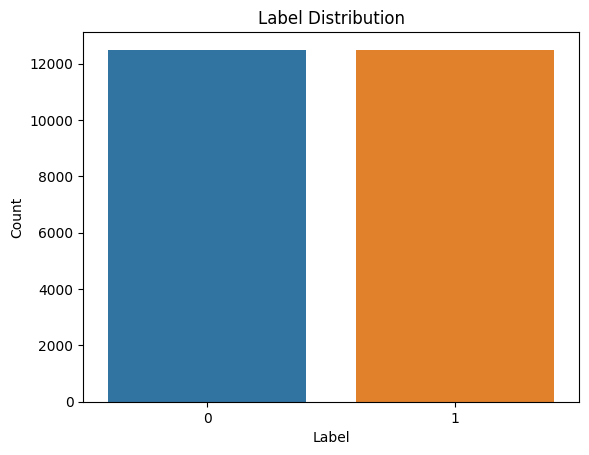

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

# Custom 2-color palette
colors = ['#1f77b4', '#ff7f0e']  # Blue and Orange

sns.countplot(x='label', data=df, palette=colors)
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

## Create DataGenerator for the Images

In [189]:
df['label'] = df['label'].astype('str')

In [190]:
df.head()

images label
0  PetImages/Dog/8628.jpg     1
1  PetImages/Dog/8746.jpg     1
2  PetImages/Cat/3396.jpg     0
3  PetImages/Cat/4830.jpg     0
4  PetImages/Dog/8733.jpg     1

In [191]:
#input split
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size = 0.2, random_state=42)

In [192]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255, #normalizaton of images
    rotation_range = 40, #aufmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train,
    x_col='images',
    y_col='label',
    target_size=(128, 128),
    batch_size=512,
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test,
    x_col='images',
    y_col='label',
    target_size=(128, 128),
    batch_size=512,
    class_mode='binary'
)

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


## Model Creation

In [193]:
from keras import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense

model = Sequential([
                      Conv2D(16, (3,3), activation= 'relu', input_shape = (128,128,3)),
                      MaxPool2D((2,2)),
                      Conv2D(32, (3,3),activation='relu'),
                      MaxPool2D((2,2)),
                      Conv2D(64, (3,3),activation='relu'),
                      MaxPool2D((2,2)),
                      Flatten(),
                      Dense(512,activation='relu'),
                      Dense(1,activation='sigmoid')
])


In [194]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)              │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,447,137 (24.59 MB)

 Trainable params: 6,447,137 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

In [195]:
history = model.fit(train_iterator, epochs=5, validation_data=val_iterator)


Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 421s 10s/step - accuracy: 0.4946 - loss: 1.0118 - val_accuracy: 0.6192 - val_loss: 0.6859
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 419s 10s/step - accuracy: 0.5980 - loss: 0.6764 - val_accuracy: 0.6268 - val_loss: 0.6495
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 432s 10s/step - accuracy: 0.6475 - loss: 0.6295 - val_accuracy: 0.6806 - val_loss: 0.5998
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 421s 10s/step - accuracy: 0.6835 - loss: 0.5971 - val_accuracy: 0.7070 - val_loss: 0.5722
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 439s 10s/step - accuracy: 0.7065 - loss: 0.5698 - val_accuracy: 0.7250 - val_loss: 0.5467


## Visualization of Results

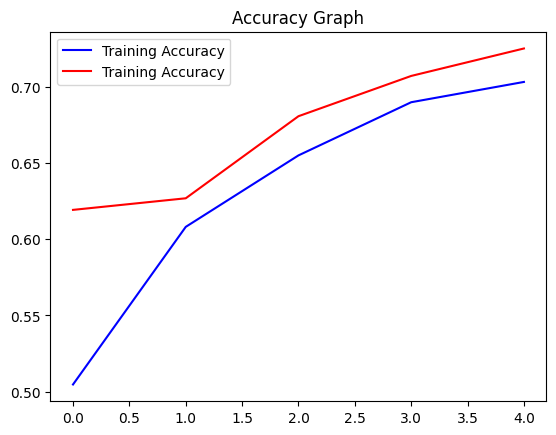

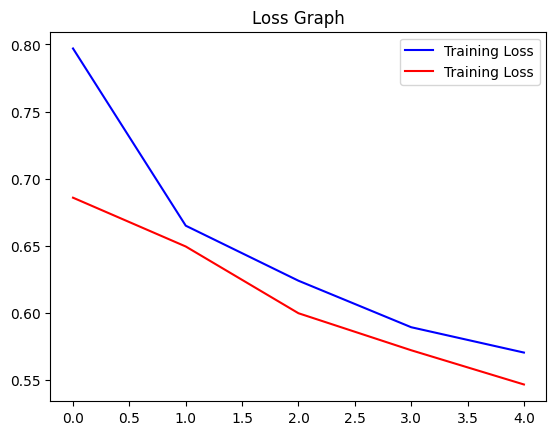

In [196]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs,acc,'b', label='Training Accuracy')
plt.plot(epochs,val_acc,'r', label='Training Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs,loss,'b', label='Training Loss')
plt.plot(epochs,val_loss,'r', label='Training Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()